In [24]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency
import missingno as msno

In [12]:
df = pd.read_csv(r"/workspaces/carlos060495-intro-ml/data/raw/bank-marketing-campaign-data.csv", sep=";")
pd.set_option('display.max_columns', None)
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [13]:
df.shape

(41188, 21)

# 1.1 Identificar y eliminar columnas con valores contantes

In [14]:
unicos = df.nunique()
df[unicos[unicos==1].index]

""
0
1
2
3
4
...
41183
41184
41185
41186


# 1.2 Eliminamos filas y columnas duplicadas

In [15]:
df.duplicated().sum()

np.int64(12)

In [16]:
df.T.duplicated().sum()

np.int64(0)

In [17]:
df.T.duplicated(keep=False)

age               False
job               False
marital           False
education         False
default           False
housing           False
loan              False
contact           False
month             False
day_of_week       False
duration          False
campaign          False
pdays             False
previous          False
poutcome          False
emp.var.rate      False
cons.price.idx    False
cons.conf.idx     False
euribor3m         False
nr.employed       False
y                 False
dtype: bool

# 1.3 Eliminar columnas redundantes

In [18]:
# Codificar y como binaria
df['y_bin'] = df['y'].map({'yes': 1, 'no': 0})

# Selección de columnas numéricas
num_cols = [
    'age', 'duration', 'campaign', 'pdays', 'previous',
    'emp.var.rate', 'cons.price.idx', 'cons.conf.idx',
    'euribor3m', 'nr.employed'
]

# Correlación con y_bin
correlations = df[num_cols].corrwith(df['y_bin']).sort_values(ascending=False)
print(correlations)
print()

cat_cols = [
    'job', 'marital', 'education', 'default', 'housing', 'loan',
    'contact', 'month', 'day_of_week', 'poutcome'
]

results = []
for col in cat_cols:
    table = pd.crosstab(df[col], df['y'])
    chi2, _, _, _ = chi2_contingency(table)
    n = table.values.sum()
    r, k = table.shape
    v = np.sqrt(chi2 / (n * (min(r-1, k-1))))
    results.append((col, v))

# Mostrar ordenado por fuerza de asociación
assoc_df = pd.DataFrame(results, columns=['Variable', 'Cramers_V']).sort_values('Cramers_V', ascending=False)
print(assoc_df)



duration          0.405274
previous          0.230181
cons.conf.idx     0.054878
age               0.030399
campaign         -0.066357
cons.price.idx   -0.136211
emp.var.rate     -0.298334
euribor3m        -0.307771
pdays            -0.324914
nr.employed      -0.354678
dtype: float64

      Variable  Cramers_V
9     poutcome   0.320488
7        month   0.274395
0          job   0.152768
6      contact   0.144693
3      default   0.099354
2    education   0.068472
1      marital   0.054570
8  day_of_week   0.025195
4      housing   0.011748
5         loan   0.005154


Se eliminan las columnas 'day_of_week', 'housing' y 'loan' porque muestran una asociación casi nula con la variable objetivo y no aportan información relevante ni diferenciada respecto a otras variables del dataset, y su inclusión solo añadiría ruido al modelo.

In [19]:
df = df.drop(['day_of_week', 'housing', 'loan'], axis=1)
df

,age,job,marital,education,default,contact,month,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,y_bin
0,56,housemaid,married,basic.4y,no,telephone,may,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
1,57,services,married,high.school,unknown,telephone,may,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
2,37,services,married,high.school,no,telephone,may,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
3,40,admin.,married,basic.6y,no,telephone,may,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
4,56,services,married,high.school,no,telephone,may,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,cellular,nov,334,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes,1
41184,46,blue-collar,married,professional.course,no,cellular,nov,383,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no,0
41185,56,retired,married,university.degree,no,cellular,nov,189,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no,0
41186,44,technician,married,professional.course,no,cellular,nov,442,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes,1


# 1.4 Eliminar columnas Data leakage

La columna 'duration' se elimina porque su valor solo se conoce después de la interacción con el cliente, lo que introduce data leakage; en otras palabras, el modelo estaría aprendiendo de un dato que depende directamente del resultado de la llamada, generando un entrenamiento poco realista y un desempeño engañoso en producción.


In [20]:
df = df.drop(['duration'], axis=1)
df


,age,job,marital,education,default,contact,month,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,y_bin
0,56,housemaid,married,basic.4y,no,telephone,may,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
1,57,services,married,high.school,unknown,telephone,may,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
2,37,services,married,high.school,no,telephone,may,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
3,40,admin.,married,basic.6y,no,telephone,may,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
4,56,services,married,high.school,no,telephone,may,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,cellular,nov,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes,1
41184,46,blue-collar,married,professional.course,no,cellular,nov,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no,0
41185,56,retired,married,university.degree,no,cellular,nov,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no,0
41186,44,technician,married,professional.course,no,cellular,nov,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes,1


# 1.5 Valores faltantes

In [21]:
faltantes = df.isna().mean()*100
faltantes[faltantes>0]

Series([], dtype: float64)

In [22]:
df.isnull().any(axis=1).sum()

np.int64(0)

<Axes: >

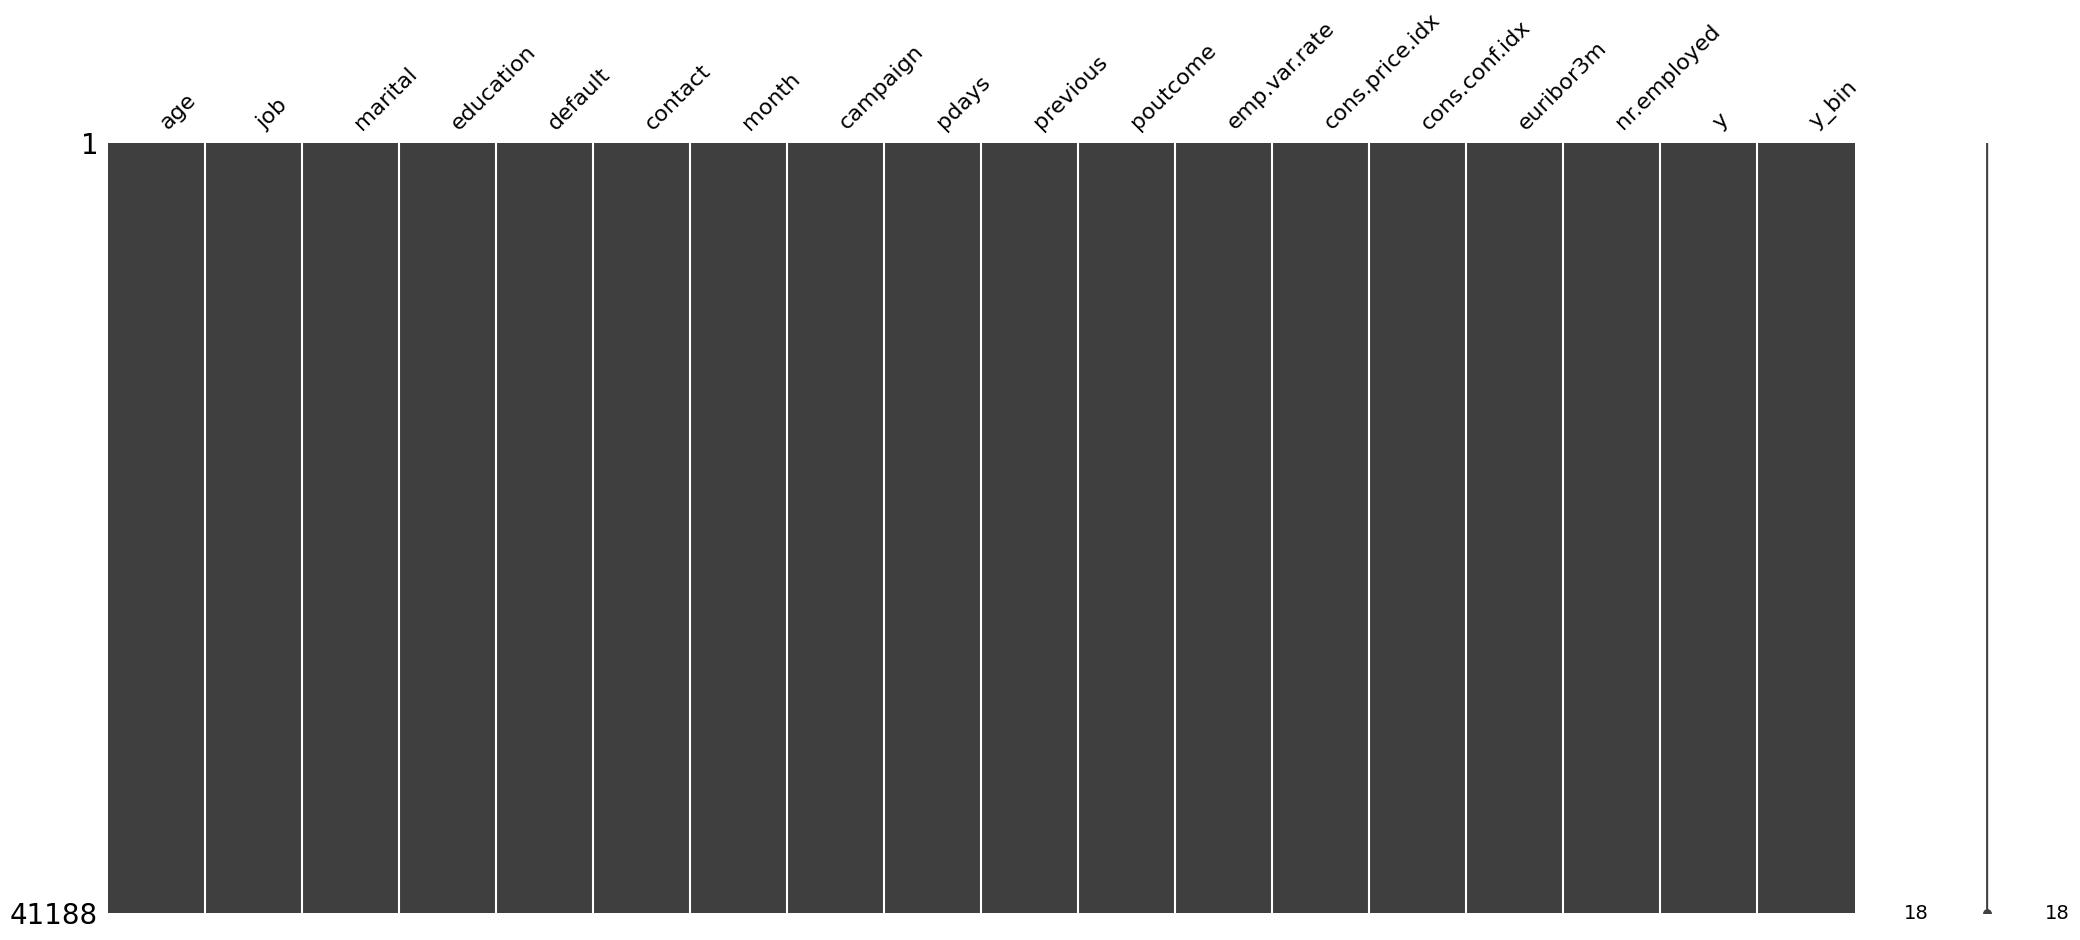

In [25]:
msno.matrix(df)